In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from  sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier,RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")


In [265]:
df= pd.read_csv("files/cleaned_loan.csv")
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1.0,0.0,0.0,0.0,4583.000000,1508.0,128.000000,360.0,1.0,0,0
1,LP001005,1.0,1.0,0.0,1.0,0.0,5378.867314,0.0,146.023411,360.0,1.0,1,1
2,LP001006,1.0,1.0,0.0,0.0,3.0,2583.000000,2358.0,120.000000,360.0,1.0,2,1
3,LP001008,1.0,0.0,0.0,0.0,0.0,6000.000000,0.0,141.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000.000000,0.0,141.000000,360.0,1.0,2,1


distribution


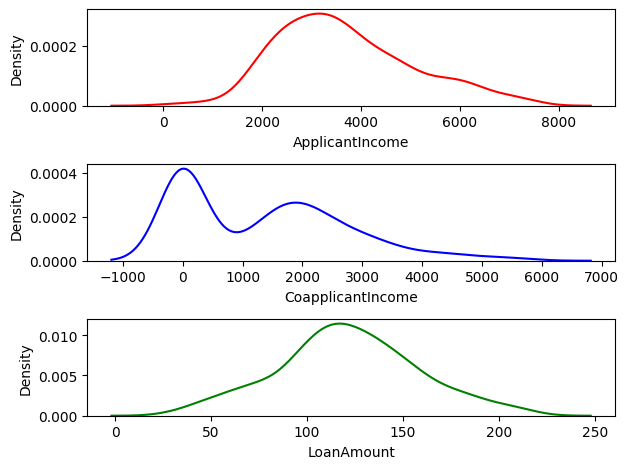

In [266]:


plt.subplot(3,1,1)
sns.kdeplot(x=df["ApplicantIncome"],data=df,color="r")
plt.subplot(3,1,2)
sns.kdeplot(x=df["CoapplicantIncome"],data=df,color="b")
plt.subplot(3,1,3)
sns.kdeplot(x=df["LoanAmount"],data=df,color="g")

plt.tight_layout()
plt.show()

In [267]:

df = df.drop("Loan_ID",axis=1)


Splitting & standarizing

In [268]:
x = df.drop(["Loan_Status"],axis=1)
y = df["Loan_Status"]


x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train = pd.DataFrame(x_train,columns=x.columns)



models

In [269]:
sv = SVC()
sv.fit(x_train,y_train)
print(sv.score(x_train,y_train)*100 ,sv.score(x_test,y_test)*100)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100)


gnb = GaussianNB()
gnb.fit(x_train,y_train)
print(gnb.score(x_train,y_train)*100, gnb.score(x_test,y_test)*100)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100)

kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
print(kn.score(x_train,y_train)*100, kn.score(x_test,y_test)*100)




83.33333333333334 80.61224489795919
100.0 70.40816326530613
80.76923076923077 81.63265306122449
100.0 77.55102040816327
83.84615384615385 75.51020408163265


In [270]:
estimators_list = [("sv",SVC()) , ("gnb" , GaussianNB()) ,("kn",KNeighborsClassifier()) ]

vc =VotingClassifier(estimators=estimators_list)

vc.fit(x_train,y_train)



VotingClassifier(estimators=[('sv', SVC()), ('gnb', GaussianNB()),
                             ('kn', KNeighborsClassifier())])

In [271]:
print(vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100)

82.3076923076923 80.61224489795919


In [272]:
vote = pd.DataFrame ({"dt": dt.predict(x_test), "svm": sv.predict(x_test) , "gnb": gnb.predict(x_test),"rf": rf.predict(x_test),"kn":kn.predict(x_test), "voting": vc.predict(x_test)})

vote

,dt,svm,gnb,rf,kn,voting
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
93,1,1,1,1,1,1
94,1,1,1,1,1,1
95,1,1,1,1,1,1
96,0,0,0,0,1,0


confusion metrix

In [275]:
y_pred = vc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[13 19]
 [ 0 66]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        32
           1       0.78      1.00      0.87        66

    accuracy                           0.81        98
   macro avg       0.89      0.70      0.73        98
weighted avg       0.85      0.81      0.78        98



              precision    recall  f1-score   support

           0       1.00      0.41      0.58        32
           1       0.78      1.00      0.87        66

    accuracy                           0.81        98
   macro avg       0.89      0.70      0.73        98
weighted avg       0.85      0.81      0.78        98

